# Observational dataset n = 10

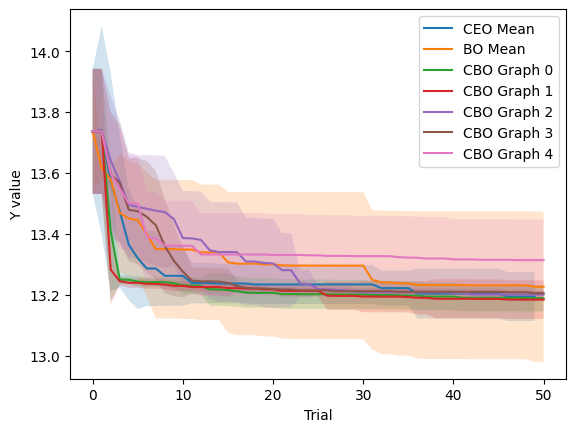

In [2]:
from result_utils import plot_everything
base_path = "Graph6"
plot_everything(base_path=base_path, experiment="Best_Y", n_obs=10, num_cbo_graphs=5, save_file=True)

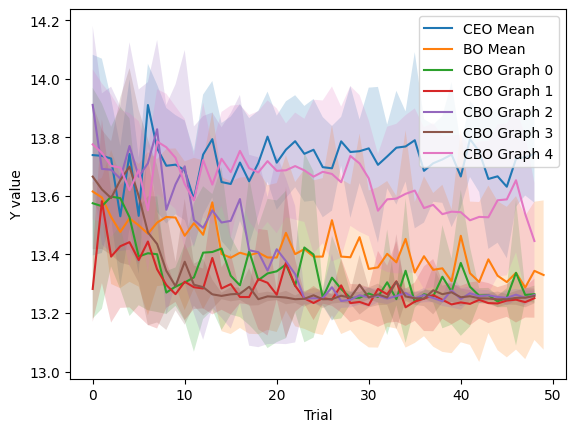

In [3]:
plot_everything(base_path=base_path, experiment="Per_trial_Y", n_obs=10, num_cbo_graphs=5, save_file=True)

# Observational dataset n = 50

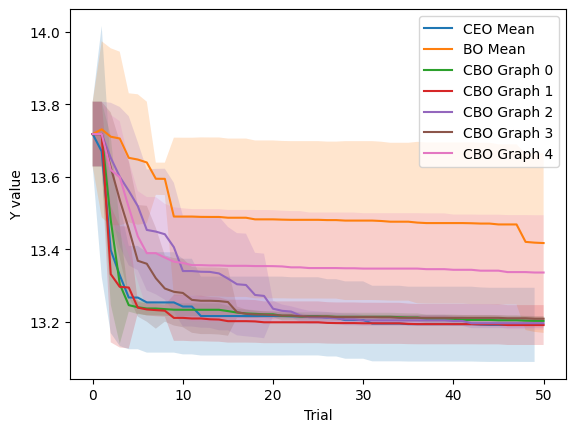

In [4]:
plot_everything(base_path=base_path, experiment="Best_Y", n_obs=50, num_cbo_graphs=5, save_file=True)

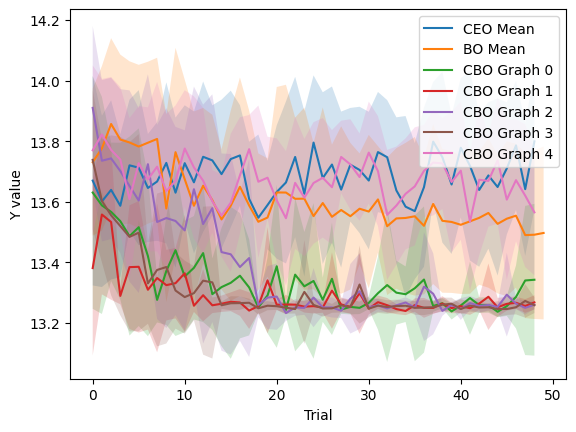

In [5]:
plot_everything(base_path=base_path, experiment="Per_trial_Y", n_obs=50, num_cbo_graphs=5, save_file=True)

# Observational dataset n = 100

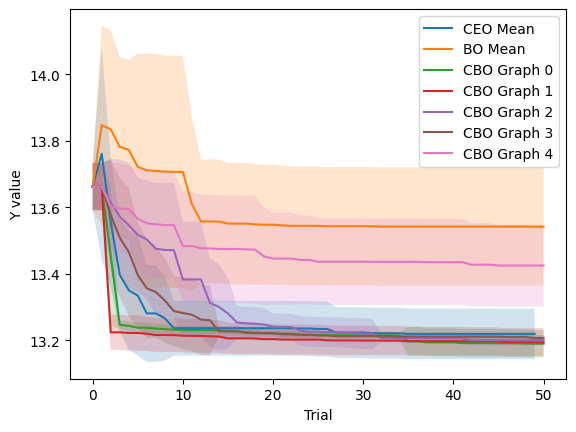

In [6]:
plot_everything(base_path=base_path, experiment="Best_Y", n_obs=100, num_cbo_graphs=5, save_file=True)

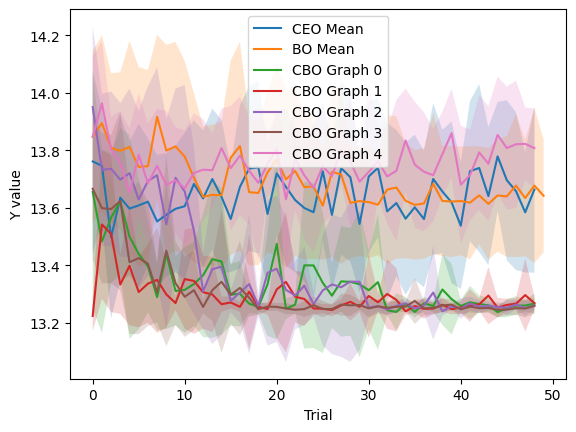

In [7]:
plot_everything(base_path=base_path, experiment="Per_trial_Y", n_obs=100, num_cbo_graphs=5, save_file=True)

# Observational dataset n = 200

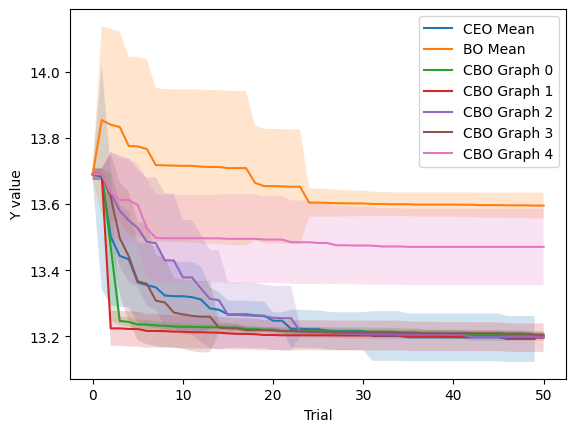

In [8]:
plot_everything(base_path=base_path, experiment="Best_Y", n_obs=200, num_cbo_graphs=5, save_file=True)

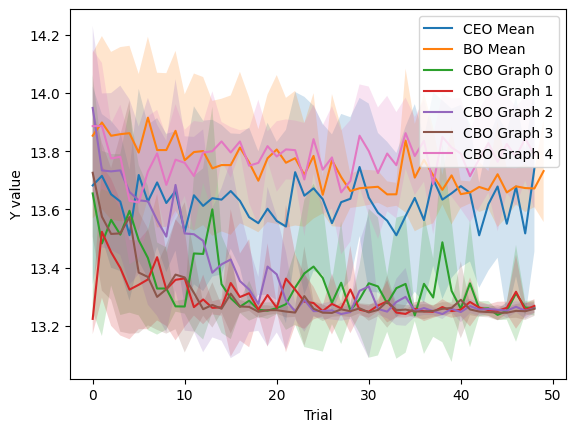

In [9]:
plot_everything(base_path=base_path, experiment="Per_trial_Y", n_obs=200, num_cbo_graphs=5, save_file=True)

# Version 2 - Graph 6

In [7]:
from result_utils import plot_everything
base_path = "Graph6_v2"

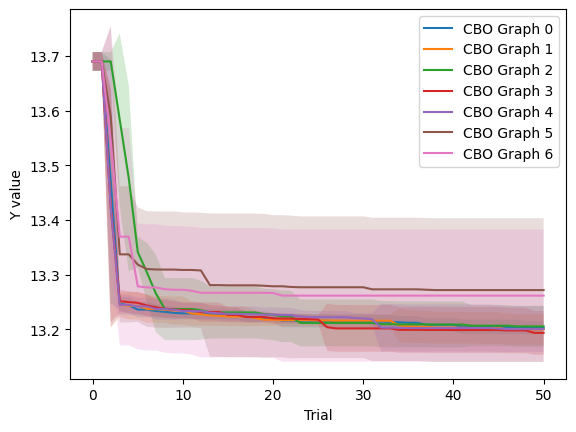

In [8]:
plot_everything(base_path=base_path, experiment="Best_Y", n_obs=200, num_cbo_graphs=7, save_file=False, plot_ceo=False, plot_bo=False)

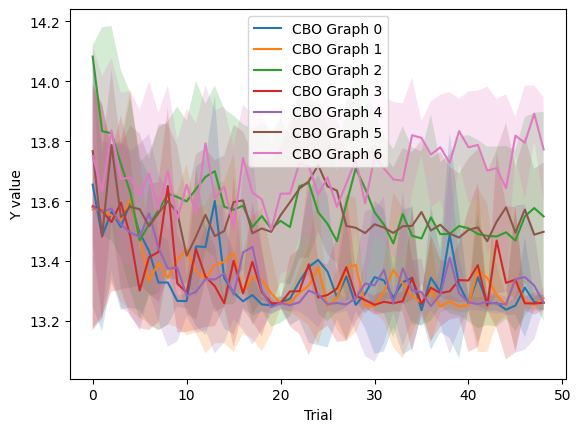

In [10]:
plot_everything(base_path=base_path, experiment="Per_trial_Y", n_obs=200, num_cbo_graphs=7, save_file=False, plot_ceo=False, plot_bo=False)

# Graph 4

In [12]:
from result_utils import plot_everything
base_path = "Graph4"

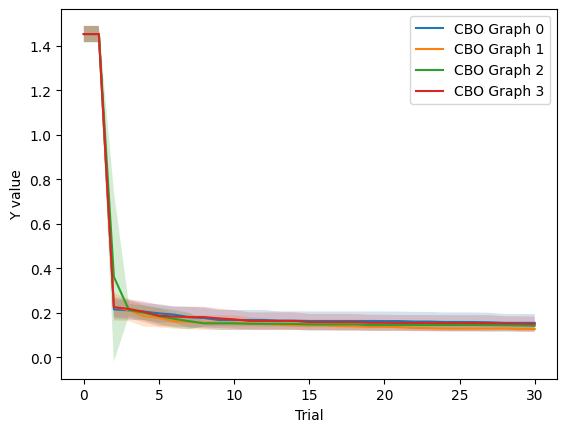

In [13]:
plot_everything(base_path=base_path, experiment="Best_Y", n_obs=200, num_cbo_graphs=4, save_file=False, plot_ceo=False, plot_bo=False)

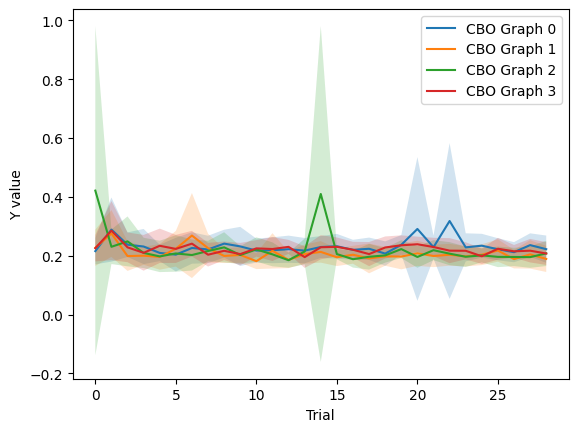

In [14]:
plot_everything(base_path=base_path, experiment="Per_trial_Y", n_obs=200, num_cbo_graphs=4, save_file=False, plot_ceo=False, plot_bo=False)